In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'c:\Users\abdal\OneDrive\Desktop\DEPI\MATERIAL\Technical\Processing and Visualization\Session3 - Matplotlib & Seaborn\diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53947 entries, 0 to 53946
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53947 non-null  int64  
 1   carat       53947 non-null  float64
 2   cut         53944 non-null  object 
 3   color       53946 non-null  object 
 4   clarity     53947 non-null  object 
 5   depth       53946 non-null  float64
 6   table       53947 non-null  float64
 7   price       53947 non-null  int64  
 8   x           53947 non-null  float64
 9   y           53947 non-null  float64
 10  z           53947 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 4.5+ MB


In [16]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y
count,53947.000000,53947.000000,53946.000000,53947.000000,53947.000000,53947.000000,53947.000000
mean,26973.000000,0.797936,61.749271,57.457143,3932.614158,5.731181,5.734549
std,15573.301823,0.473981,1.432571,2.234418,3989.233934,1.121691,1.142063
min,0.000000,0.200000,43.000000,43.000000,-200.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000
50%,26973.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000
75%,40459.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000
max,53946.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000


In [19]:
df.dtypes


Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z              object
dtype: object

In [63]:
df['z'] = pd.to_numeric(df['z'], errors='coerce')


In [22]:
df.dtypes


Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [23]:
df = df.drop('Unnamed: 0', axis=1)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53947 entries, 0 to 53946
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53947 non-null  float64
 1   cut      53944 non-null  object 
 2   color    53946 non-null  object 
 3   clarity  53947 non-null  object 
 4   depth    53946 non-null  float64
 5   table    53947 non-null  float64
 6   price    53947 non-null  int64  
 7   x        53947 non-null  float64
 8   y        53947 non-null  float64
 9   z        53946 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [29]:
df['cut'].unique()

array(['IDEAL', 'PREMIUM', 'GOOD', 'VERY GOOD', 'FAIR', nan], dtype=object)

In [26]:
df['cut'].str[0].str.islower().all()


np.False_

In [27]:
df['cut'] = df['cut'].str.upper()


In [28]:
df['cut'].str[0].str.isupper().all()


np.True_

In [30]:
df.duplicated().sum()


np.int64(153)

In [31]:
df = df.drop_duplicates()


In [32]:
df.duplicated().sum()


np.int64(0)

In [33]:
df.isnull().sum()


carat      0
cut        3
color      1
clarity    0
depth      1
table      0
price      0
x          0
y          0
z          1
dtype: int64

In [40]:
df = df.dropna()


In [41]:
df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [34]:
(df.isnull().sum() / len(df)) * 100


carat      0.000000
cut        0.005577
color      0.001859
clarity    0.000000
depth      0.001859
table      0.000000
price      0.000000
x          0.000000
y          0.000000
z          0.001859
dtype: float64

In [37]:
df[df['price'] < 0]


,carat,cut,color,clarity,depth,table,price,x,y,z
704,0.91,FAIR,J,VS2,65.4,60.0,-200,6.04,6.0,3.94


In [38]:
df = df[df['price'] >= 0]


In [39]:
df[df['price'] < 0]


,carat,cut,color,clarity,depth,table,price,x,y,z


<Axes: xlabel='price', ylabel='depth'>

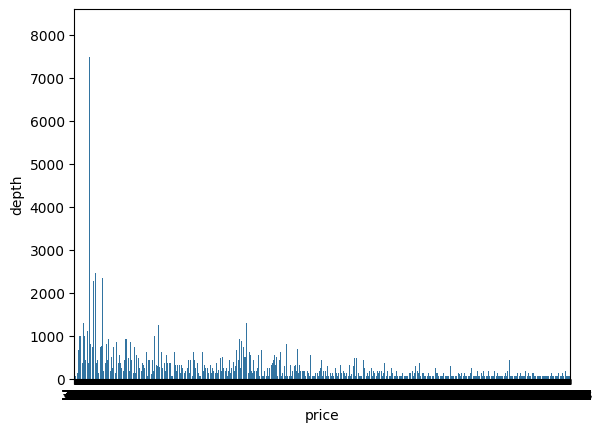

In [42]:
sns.barplot(x='price', y='depth', data=df, estimator=sum, errorbar=None)


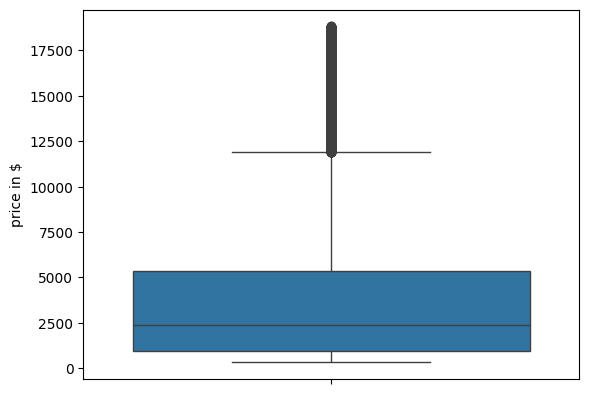

In [56]:
sns.boxplot(y='price', data=df)
plt.ylabel("price in $")
plt.show()


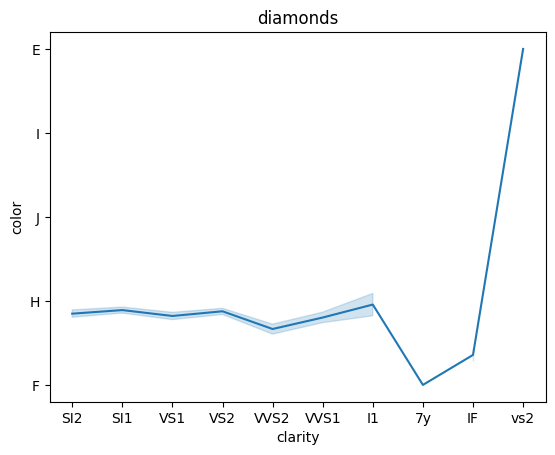

In [55]:
# Line plot showing the number of passengers over time
sns.lineplot(x='clarity', y='color', data=df)
plt.title("diamonds")
plt.xlabel("clarity")
plt.ylabel("color")
plt.show()

In [50]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', '8', '7y', 'IF',
       'vs2'], dtype=object)

In [52]:
df[df['clarity'] == '8'].index


Index([68], dtype='int64')

In [53]:
df = df.drop(68)


In [61]:
df[df['clarity'] == '7y'].index


Index([205], dtype='int64')

In [62]:
df = df.drop(205)


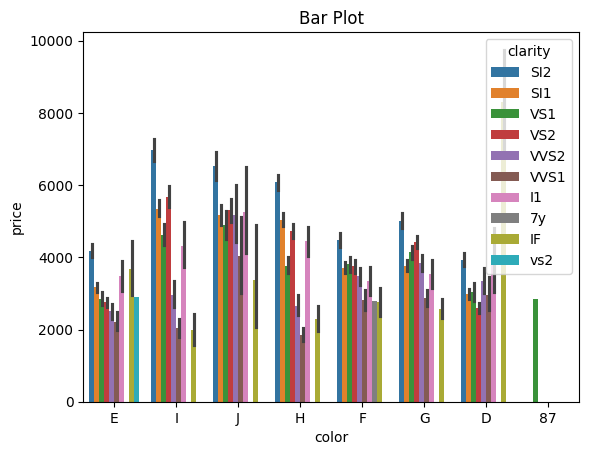

In [54]:
sns.barplot(x='color', y='price',hue="clarity", data=df)
plt.title("Bar Plot")
plt.show()


In [58]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D', '87'], dtype=object)

In [59]:
df[df['color'] == '87'].index


Index([619], dtype='int64')

In [60]:
df = df.drop(619)


In [6]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair', 'very good',
       'ideal', 'premium', nan], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder ()
df['cut'] = encoder.fit_transform(df ['cut'])